# StableDiffusion 사용하기

In [1]:
!pip install diffusers matplotlib

In [1]:
import torch
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler

In [2]:
model_id = "stabilityai/stable-diffusion-2-1"

pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)

pipe = pipe.to("cuda")

pipe.enable_attention_slicing()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/537 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


tokenizer_config.json:   0%|          | 0.00/824 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/345 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/633 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


config.json:   0%|          | 0.00/939 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/611 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

### pipe.enable_attention_slicing()

모델과 세팅에 따라 attention slicing을 해야 이미지가 제대로 생성될 때도 있고 attention slicing을 하지않아야 생성되는 경우도 있기 때문에 직접 적용해보고 사용할지 말지 판단하는 것을 추천

In [ ]:
# 만약 최신 버전의 pytorch를 설치했다면 2.x 버전
# First-time "warmup" pass if PyTorch version is 1.13
# _ = pipe(prompt, num_inference_steps=1)

In [32]:
print(torch.__version__)

2.6.0+cu124


In [27]:
%%time

prompt = "a photo of an doctor riding a cars on road"
image = pipe(prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

CPU times: user 23.2 s, sys: 19.6 s, total: 42.8 s
Wall time: 43.3 s


In [25]:
%%time

prompt = "의사가 길 위에서 차를 타고 있는 사진"
image = pipe(prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

In [28]:
image.save("doctor_rides_cars.png")

In [29]:
import matplotlib.pyplot as plt

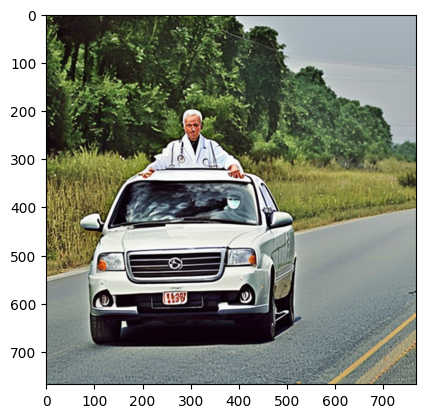

In [30]:
plt.imshow(image)